In [32]:
import osmnx as ox
import networkx as nx
import geopandas as gpd

# Place to query
center_point = (37.335796, -121.885254)

# Radius in meters
dist = 2000

# Tags to query by
element_tags = {
    'amenity': ['fuel'], # Gas-stations
    'building': ['retail', 'residential'], # Paracel target locations
    'highway': ['stop', 'traffic_signals'] # Stopsigns and stoplights 
}

# Creates generator for each tag {key: [values]}
queries = [{key: value} for key, value in element_tags.items()]

# Collects elements via each tag key individually to avoid timeout due to large requests
elements = [ox.geometries.geometries_from_point(center_point=center_point, tags=query, dist=dist)
            for query in queries]

gasstations, buildings, traffic_signals = [elem_type for elem_type in elements]
elements_df = elements[0].append(elements[1:])

C:\Users\12162\AppData\Local\Temp/ipykernel_40336/4016424094.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  elements_df = elements[0].append(elements[1:])


In [33]:
# Collects road network
G = ox.graph_from_point(center_point, dist=dist, network_type='drive_service')

# Converts network graph to geodataframe
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)

Elements within each tag:
    amenity: 15
    building: 145
    highway: 584


Text(0.5, 1.0, 'Stopsigns and Stoplights')

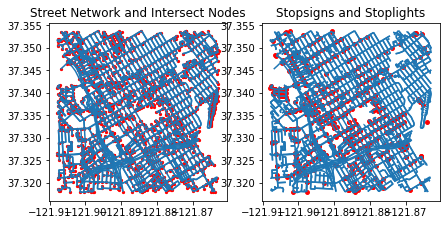

In [34]:
import matplotlib.pyplot as plt

print('Elements within each tag:')
for tag, geodata in zip(element_tags.keys(), elements):
    print(f'    {tag}: {len(geodata)}')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7,7))

# Plot street network
edges.plot(ax=ax[0])
edges.plot(ax=ax[1])

# Plot street intersects
nodes.plot(markersize=5, ax=ax[0], color='red')
# Plot stopsigns and stoplights
traffic_signals.plot(markersize=15, ax=ax[1], color='red')

# Assign titles
ax[0].set_title("Street Network and Intersect Nodes")
ax[1].set_title("Stopsigns and Stoplights")

In [22]:
conda install -c conda-forge osmnx


Note: you may need to restart the kernel to use updated packages.


C:\Users\12162\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
C:\Users\12162\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
C:\Users\12162\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [23]:
conda install -c "conda-forge/label/cf201901" osmnx


Note: you may need to restart the kernel to use updated packages.


In [24]:
pip install osmnx

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyproj>=3.4 in c:\users\12162\anaconda3\lib\site-packages (from osmnx) (3.4.1)



You should consider upgrading via the 'C:\Users\12162\anaconda3\python.exe -m pip install --upgrade pip' command.
C:\Users\12162\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
C:\Users\12162\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
C:\Users\12162\anaconda3\lib\threading.py:914: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs


In [25]:
conda activate ox


Note: you may need to restart the kernel to use updated packages.


In [56]:
# Get the x coordinates of the nodes
nodes['x'] = nodes["x"].astype(float)

# Get the Convex Hull of the network
convex_hull = edges.unary_union.convex_hull # Hull of network
centroid = convex_hull.centroid # Centroid of corvex hull
orig_xy = (centroid.y, centroid.x) # Get origin x and y coordinates

# Retrieve the most eastern node
maxx = nodes['x'].max() # Highest 'x' value (coordinate)
target = nodes.loc[nodes['x']==maxx, 'geometry'].values[0] # Returns geometry of node with max-x coord
target_xy = (target.y, target.x) # Get target x and y coordinates

# Find the node (id) in graph that is closest to origin point
orig_node = ox.distance.nearest_nodes(G, 37.33578234867195,-121.8854454267764, return_dist=True)

# Find the node (id) in graph that is closest to target point
target_node = ox.distance.nearest_nodes(G, 37.3493503,-321.8627317, return_dist=True)

# Calculate the shortest path
route = nx.shortest_path_length(G=G, source=orig_node, target=target_node)

print(f'Origin: {37.33578234867195}\nTarget: {37.3493503}\n')
print(f'Origin Node ID: {orig_node}\nTarget Node ID: {target_node}\n')
print(f'Route: {route}')

IndexError: tuple index out of range

In [41]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(G, route)

NameError: name 'route' is not defined